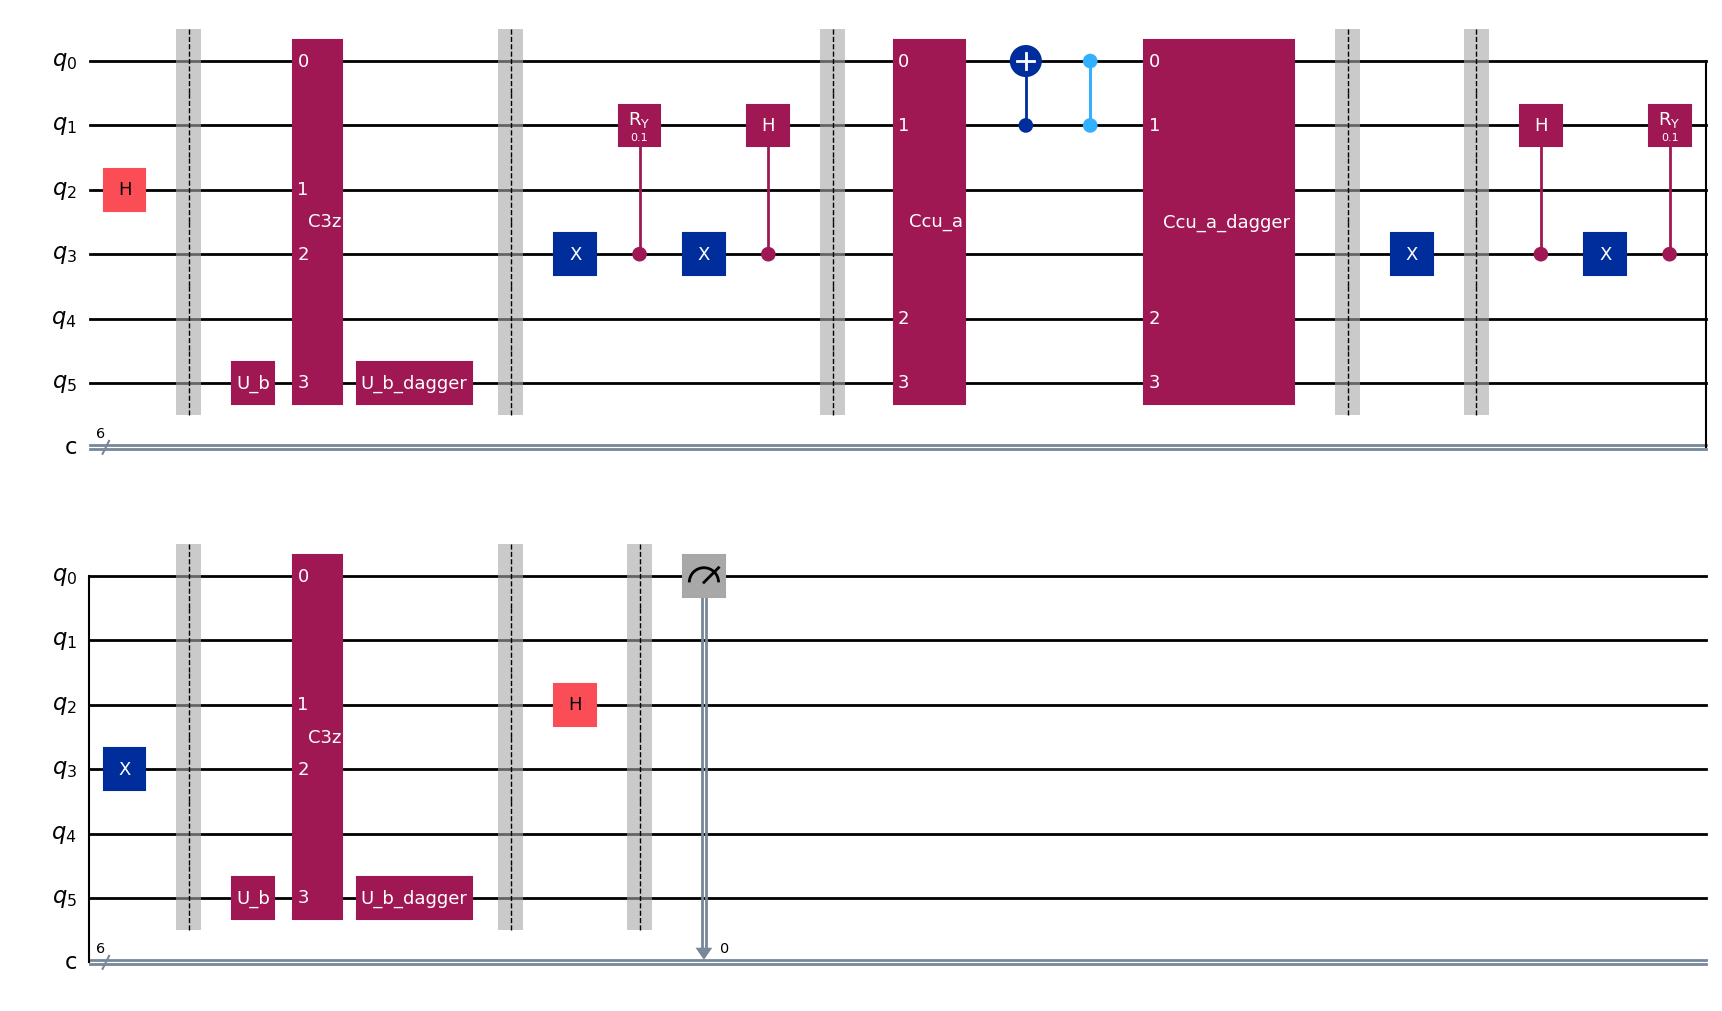

In [2]:
import deepquantum as dq
import numpy as np

def QDALS():
    cir = dq.QubitCircuit(6)

    # U_b=[[1,0],[0,-1]]
    # U_b_dagger=[[1,0],[0,-1]]

    # U_A=[[1/2,1/2,1/2,1/2],[1/2,-1/2,1/2,-1/2],[1/2,1/2,-1/2,-1/2],[1/2,-1/2,-1/2,1/2]]
    # U_A_dagger=[[1/2,1/2,1/2,1/2],[1/2,-1/2,1/2,-1/2],[1/2,1/2,-1/2,-1/2],[1/2,-1/2,-1/2,1/2]]

    U_b=[[3/np.sqrt(10),-1/np.sqrt(10)],[1/np.sqrt(10),3/np.sqrt(10)]]
    U_b_dagger=[[3/np.sqrt(10),-1/np.sqrt(10)],[1/np.sqrt(10),3/np.sqrt(10)]]

    U_A=[[ 0.8       ,  0.4       ,  0.07725774,  0.44048978],
    [ 0.4       ,  0.        ,  0.44048978, -0.80372182],
    [ 0.07725774,  0.44048978, -0.8       , -0.4       ],
    [ 0.44048978, -0.80372182, -0.4       , -0.        ]]

    U_A_dagger=[[ 0.8       ,  0.4       ,  0.07725774,  0.44048978],
    [ 0.4       ,  0.        ,  0.44048978, -0.80372182],
    [ 0.07725774,  0.44048978, -0.8       , -0.4       ],
    [ 0.44048978, -0.80372182, -0.4       , -0.        ]]

    # 应用Hadamard门
    cir.h(2)
    cir.barrier()

    # CU_Qb1
    cir.any(unitary=U_b,wires=[5],name='U_b')
    cir.z(5,controls=[0,2,3])
    cir.any(unitary=U_b_dagger,wires=[5],name='U_b_dagger')
    cir.barrier()

    # CR_s0
    cir.x(3)
    cir.cry(3,1,0.1)
    cir.x(3)
    cir.h(1,controls=3)
    cir.barrier()

    # U_A_f
    cir.any(unitary=U_A,wires=[4,5],name='U_A',controls=[0,1])
    cir.cnot(1,0)
    cir.cz(0,1)
    cir.any(unitary=U_A_dagger,wires=[4,5],name='U_A_dagger',controls=[0,1])
    cir.barrier()


    # X
    cir.x(3)
    cir.barrier()
    
    # CR_s0
    cir.h(1,controls=3)
    cir.x(3)
    cir.cry(3,1,0.1)
    cir.x(3)
    cir.barrier()

    # CU_Qb1
    cir.any(unitary=U_b,wires=[5],name='U_b')
    cir.z(5,controls=[0,2,3])
    cir.any(unitary=U_b_dagger,wires=[5],name='U_b_dagger')
    cir.barrier()

    # 应用Hadamard门
    cir.h(2)
    cir.barrier()



    # 测量控制寄存器
    cir.measure(wires=0)

    return cir

# 绘制量子线路图
QDALS_circuit = QDALS()
QDALS_circuit.draw()

In [246]:
def generate_unitary_matrix(n):
    # 生成一个随机的复数矩阵
    A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
    
    # 对复数矩阵进行QR分解
    Q, R = np.linalg.qr(A)
    
    # 通过QR分解生成单位复酉矩阵
    unitary_matrix = Q @ np.diag(np.exp(1j * np.angle(np.diag(R))))
    
    return unitary_matrix

In [247]:
test= generate_unitary_matrix(3)

In [250]:
test.transpose().conj()@test

array([[ 1.00000000e+00+9.06468478e-18j, -1.38777878e-17+1.59594560e-16j,
         1.11022302e-16+2.22044605e-16j],
       [-1.38777878e-17-1.73472348e-16j,  1.00000000e+00+5.42682449e-18j,
         6.24500451e-17-1.11022302e-16j],
       [ 1.11022302e-16-2.22044605e-16j,  6.24500451e-17+8.32667268e-17j,
         1.00000000e+00-1.86570505e-17j]])

In [6]:
c=0.4
A = np.array([[2,1],[1,0]])*c

u,s,v = np.linalg.svd(A)
b11 = A
b12 = u@np.diag(np.sqrt(1-s**2))@v
b21=b12
b22=-A
B=np.block([[b11, b12],
          [b21, b22]])
B

array([[ 0.8       ,  0.4       ,  0.07725774,  0.44048978],
       [ 0.4       ,  0.        ,  0.44048978, -0.80372182],
       [ 0.07725774,  0.44048978, -0.8       , -0.4       ],
       [ 0.44048978, -0.80372182, -0.4       , -0.        ]])

$ b = [3, 1] $ 需要首先被归一化，因为在量子计算中状态向量需要是单位向量。首先，计算 $ b $ 的归一化形式：

### 步骤1: 归一化向量

1. 计算向量的范数（模）:
$
   \|b\| = \sqrt{3^2 + 1^2} = \sqrt{9 + 1} = \sqrt{10}
$

2. 归一化向量:
$
   |b\rangle = \left[ \frac{3}{\sqrt{10}}, \frac{1}{\sqrt{10}} \right]
$

### 步骤2: 构造 $ U_b $

现在我们需要构造一个酉矩阵 $ U_b $，使得 $ U_b |0\rangle = |b\rangle $。

$$
U_b = \begin{bmatrix} \frac{3}{\sqrt{10}} & -\frac{1}{\sqrt{10}} \\ \frac{1}{\sqrt{10}} & \frac{3}{\sqrt{10}} \end{bmatrix}
$$

$$
U_b = \begin{bmatrix} \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \\ \frac{1}{\sqrt{10}} & -\frac{3}{\sqrt{10}} \end{bmatrix}
$$


   - 为了使第一列满足单位向量条件，我们可以尝试缩放整个矩阵。比如我们把所有元素除以根号5来尝试：
 $$
 A = \begin{bmatrix} \frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}} & * & * \\ \frac{1}{\sqrt{5}} & 0 & * & * \\ * & * & * & * \\ * & * & * & * \end{bmatrix}
 $$

In [7]:
import numpy as np

def gram_schmidt_columns(X):
    """ 对矩阵X的列应用Gram-Schmidt正交化 """
    Q, R = np.linalg.qr(X)
    return Q

def create_ub(b):
    """ 创建一个酉矩阵U_b使得U_b|0>=|b> """
    # 验证b是否已归一化，如果不是则归一化
    b = np.array(b)
    if not np.isclose(np.linalg.norm(b), 1):
        b = b / np.linalg.norm(b)
    
    # 获取向量b的维度
    n = b.shape[0]
    
    # 构建一个矩阵，第一列为b
    U = np.zeros((n, n), dtype=complex)  # 使用复数类型以处理一般情况
    U[:, 0] = b
    
    # 生成剩余的n-1个基向量
    # 开始时使用标准正交基向量
    for i in range(1, n):
        U[:, i] = np.eye(n)[:, i]
    
    # 应用Gram-Schmidt过程来正交化这些向量
    U = gram_schmidt_columns(U)
    
    return U

# 示例
b = [3, 1]  # 这里可以是任何向量
U_b = create_ub(b)
print("Matrix U_b:\n", U_b)
print("U_b |0>:\n", np.dot(U_b, np.array([1, 0])))

Matrix U_b:
 [[-0.9486833 +0.j -0.31622777+0.j]
 [-0.31622777-0.j  0.9486833 +0.j]]
U_b |0>:
 [-0.9486833 +0.j -0.31622777+0.j]


您给出的向量 \( b = [3, 1] \) 需要首先被归一化，因为在量子计算中状态向量需要是单位向量。首先，计算 \( b \) 的归一化形式：

### 步骤1: 归一化向量

1. 计算向量的范数（模）:
   \[
   \|b\| = \sqrt{3^2 + 1^2} = \sqrt{9 + 1} = \sqrt{10}
   \]

2. 归一化向量:
   \[
   |b\rangle = \left[ \frac{3}{\sqrt{10}}, \frac{1}{\sqrt{10}} \right]
   \]

### 步骤2: 构造 \( U_b \)

现在我们需要构造一个酉矩阵 \( U_b \)，使得 \( U_b |0\rangle = |b\rangle \)。由于 \( |0\rangle \) 通常代表量子位的基态 \( |0\rangle \) 和 \( |1\rangle \)（对于一个量子比特系统），我们需要 \( U_b \) 将 \( |0\rangle \) 映射到 \( |b\rangle \)。

假设 \( U_b \) 形式为：
\[
U_b = \begin{bmatrix} \alpha & \beta \\ \gamma & \delta \end{bmatrix}
\]
要求 \( U_b \) 是酉的，即 \( U_b^\dagger U_b = I \)。为了简化问题，我们可以选择 \( U_b \) 的第一列为 \( |b\rangle \)（因为 \( U_b |0\rangle = |b\rangle \)），第二列可以是与 \( |b\rangle \) 正交的单位向量。

1. 第一列已知为 \( \left[ \frac{3}{\sqrt{10}}, \frac{1}{\sqrt{10}} \right] \)。

2. 找到一个正交的单位向量。假设第二列为 \( \left[ x, y \right] \)，我们需要 \( x \) 和 \( y \) 满足：
   \[
   \frac{3}{\sqrt{10}}x + \frac{1}{\sqrt{10}}y = 0
   \]
   并且 \( x^2 + y^2 = 1 \)。选择 \( x = -\frac{1}{\sqrt{10}}, y = \frac{3}{\sqrt{10}} \) 可以满足这些条件。

因此，\( U_b \) 可以是：
\[
U_b = \begin{bmatrix} \frac{3}{\sqrt{10}} & -\frac{1}{\sqrt{10}} \\ \frac{1}{\sqrt{10}} & \frac{3}{\sqrt{10}} \end{bmatrix}
\]

这个矩阵 \( U_b \) 将基态 \( |0\rangle \) 映射到归一化的状态 \( |b\rangle \)，同时保持酉性（即 \( U_b^\dagger U_b = I \)）。这样，我们就成功构造了用于准备状态 \( |b\rangle \) 的酉算子 \( U_b \)。

要将矩阵 \( A \) 填充为酉矩阵，我们需要保证矩阵 \( A \) 满足酉矩阵的定义：\( A^\dagger A = I \)，其中 \( A^\dagger \) 是 \( A \) 的共轭转置，\( I \) 是单位矩阵。

首先，我们知道矩阵 \( A \) 的第一行和第二行部分已经给出，我们需要填充剩余的元素。矩阵 \( A \) 是一个 4x4 的矩阵，因此我们需要确保填充后的矩阵每一列都是单位向量（模为1），并且列与列之间正交。

现在让我们先分析已知信息：

\[ A = \begin{bmatrix} 2 & 1 & * & * \\ 1 & 0 & * & * \\ * & * & * & * \\ * & * & * & * \end{bmatrix} \]

1. **处理第一列和第二列**
   - 对于第一列：我们有 \( 2^2 + 1^2 + |a_{31}|^2 + |a_{41}|^2 = 1 \)（归一化条件），即 \( 5 + |a_{31}|^2 + |a_{41}|^2 = 1 \)，这显然是不可能的，因为 \( 5 > 1 \)。这提示我们原始给定的部分可能存在错误，或者需要一定的缩放。
   - 对于第二列：我们有 \( 1^2 + 0^2 + |a_{32}|^2 + |a_{42}|^2 = 1 \)，即 \( 1 + |a_{32}|^2 + |a_{42}|^2 = 1 \)。

2. **缩放第一列和第二列**
   - 为了使第一列满足单位向量条件，我们可以尝试缩放整个矩阵。比如我们把所有元素除以根号5来尝试：
   - \[ A = \begin{bmatrix} \frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}} & * & * \\ \frac{1}{\sqrt{5}} & 0 & * & * \\ * & * & * & * \\ * & * & * & * \end{bmatrix} \]

3. **填充其余元素**
   - 接下来我们需要填充其余的星号部分，确保每一列都是单位向量且列与列之间正交。这部分通常需要一些数值计算或者软件的帮助，因为手动计算会相当复杂。

鉴于第一步中发现的问题，我们可能需要重新审视问题设置或者原始的数据是否正确。如果我们假设原始的数据存在错误，我们可以尝试进行合适的缩放，或者重新定义问题。在实际操作中，这通常需要与问题提出者进行确认。

In [8]:
import pennylane as qml
from pennylane.templates.state_preparations.mottonen import compute_theta, gray_code
import numpy as np
import matplotlib.pyplot as plt

In [9]:
alphas = np.arccos(0).flatten()
thetas = compute_theta(alphas)

In [10]:
print(alphas,thetas)

[1.57079633] [1.57079633]


In [11]:
import deepquantum as dq
import numpy as np
from pennylane.templates.state_preparations.mottonen import compute_theta, gray_code

A = np.array([[-0.51192128, -0.51192128,  0.6237114 ,  0.6237114 ],
              [ 0.97041007,  0.97041007,  0.99999329,  0.99999329],
              [ 0.82429855,  0.82429855,  0.98175843,  0.98175843],
              [ 0.99675093,  0.99675093,  0.83514837,  0.83514837]])

alphas = np.arccos(A).flatten()
thetas= compute_theta(alphas)

s = int(np.log2(A.shape[0]))
wires_i = [f"i{index}" for index in range(s)]
wires_j = [f"j{index}" for index in range(s)]

code = gray_code(2 * np.log2(len(A)))
n_selections = len(code)

control_wires = [int(np.log2(int(code[i], 2) ^ int(code[(i + 1) %
                 n_selections], 2))) for i in range(n_selections)]

wire_map = {control_index : wire for control_index, wire in enumerate(wires_j + wires_i)}

In [12]:
def UA(cir,thetas, control_wires, ancilla):
    for theta, control_index in zip(thetas, control_wires):
        cir.ry(0,2 * theta)

        if wire_map[control_index]=='i0':
             wires_n=1

        if wire_map[control_index]=='i1':
             wires_n=2

        if wire_map[control_index]=='j0':
             wires_n=3

        if wire_map[control_index]=='j1':
             wires_n=4
        cir.cnot(wires_n,0)

def UB(cir,wires_i, wires_j):
    for w_i, w_j in zip(wires_i, wires_j):
        if w_i=='i0':
             i=1

        if w_i=='i1':
             i=2

        if w_j=='j0':
             j=3

        if w_j=='j1':
             j=4

        cir.swap([i, j])

def HN(cir):
        cir.h(1)
        cir.h(2)

c:\Users\HP\.conda\envs\dq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


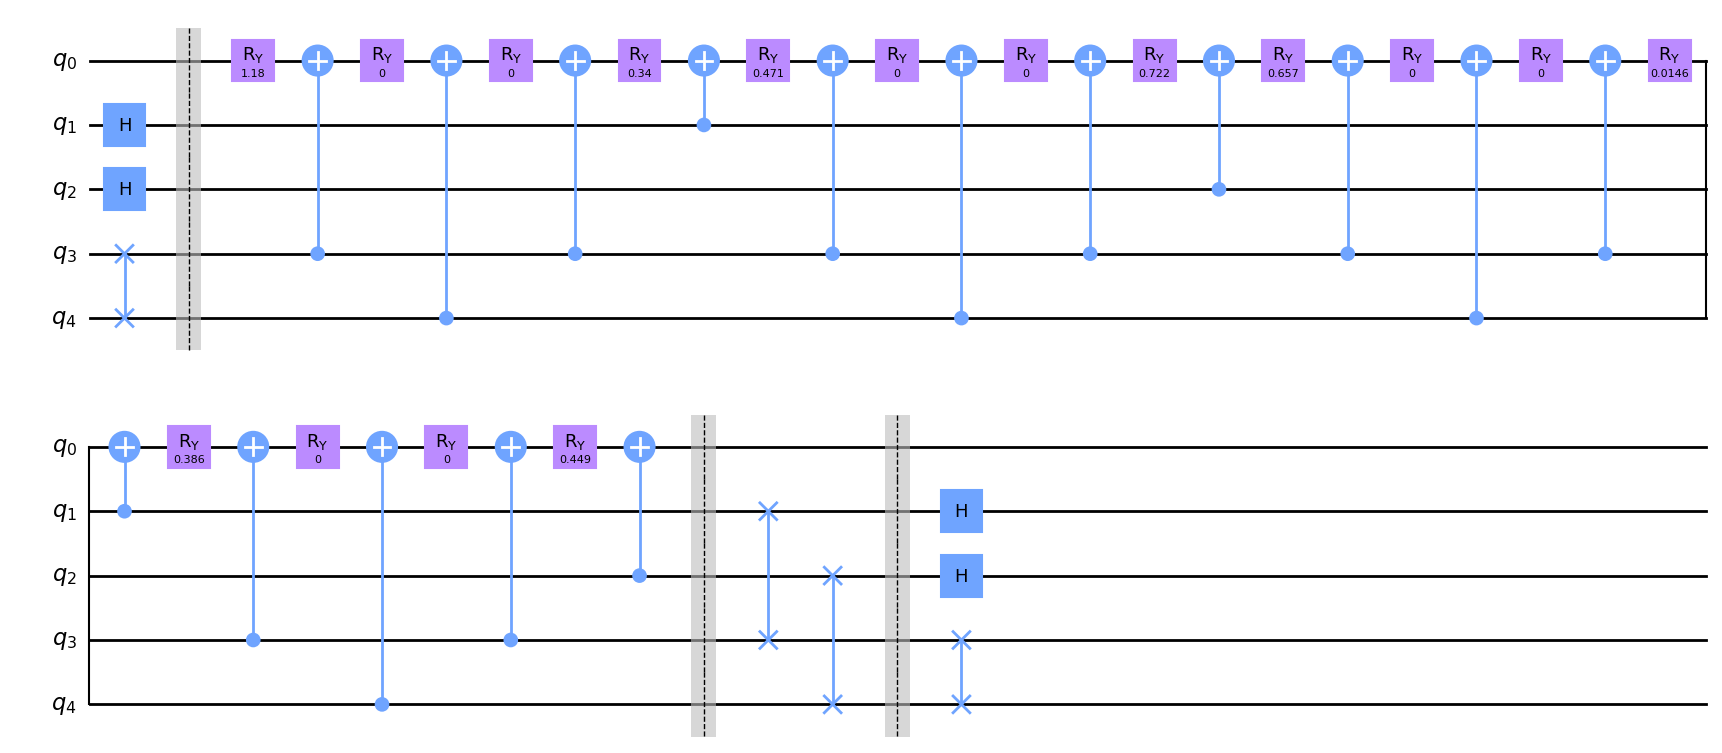

In [13]:
def circuit(cir):
    HN(cir)
    cir.barrier()
    UA(cir,thetas, control_wires,0)
    cir.barrier()
    UB(cir,wires_i, wires_j)
    cir.barrier()
    HN(cir)
    return cir

cir = dq.QubitCircuit(5)
cir.swap([3, 4])
# cir.swap([1, 2])
cir=circuit(cir)
cir.swap([3, 4])
# cir.swap([1, 2])
cir.draw()

In [14]:
 cir()
#  cir.measure(wires=[3,4],with_prob=True)

tensor([[-0.1280+0.j],
        [ 0.2426+0.j],
        [ 0.2061+0.j],
        [ 0.2492+0.j],
        [-0.1280+0.j],
        [ 0.2426+0.j],
        [ 0.2061+0.j],
        [ 0.2492+0.j],
        [-0.1280+0.j],
        [ 0.2426+0.j],
        [ 0.2061+0.j],
        [ 0.2492+0.j],
        [-0.1280+0.j],
        [ 0.2426+0.j],
        [ 0.2061+0.j],
        [ 0.2492+0.j],
        [ 0.2148+0.j],
        [ 0.0604+0.j],
        [ 0.1415+0.j],
        [ 0.0201+0.j],
        [ 0.2148+0.j],
        [ 0.0604+0.j],
        [ 0.1415+0.j],
        [ 0.0201+0.j],
        [ 0.2148+0.j],
        [ 0.0604+0.j],
        [ 0.1415+0.j],
        [ 0.0201+0.j],
        [ 0.2148+0.j],
        [ 0.0604+0.j],
        [ 0.1415+0.j],
        [ 0.0201+0.j]])

In [15]:
U = cir.get_unitary()
U.size()

torch.Size([32, 32])

In [16]:
U[:4,:4]*4

tensor([[-0.5119+0.j, -0.5119+0.j,  0.6237+0.j,  0.6237+0.j],
        [ 0.9704+0.j,  0.9704+0.j,  1.0000+0.j,  1.0000+0.j],
        [ 0.8243+0.j,  0.8243+0.j,  0.9818+0.j,  0.9818+0.j],
        [ 0.9968+0.j,  0.9968+0.j,  0.8351+0.j,  0.8351+0.j]])

In [17]:
A = np.array([[-0.51192128, -0.51192128,  0.6237114 ,  0.6237114 ],
              [ 0.97041007,  0.97041007,  0.99999329,  0.99999329],
              [ 0.82429855,  0.82429855,  0.98175843,  0.98175843],
              [ 0.99675093,  0.99675093,  0.83514837,  0.83514837]])


5.3811316835870615 [1, 2]


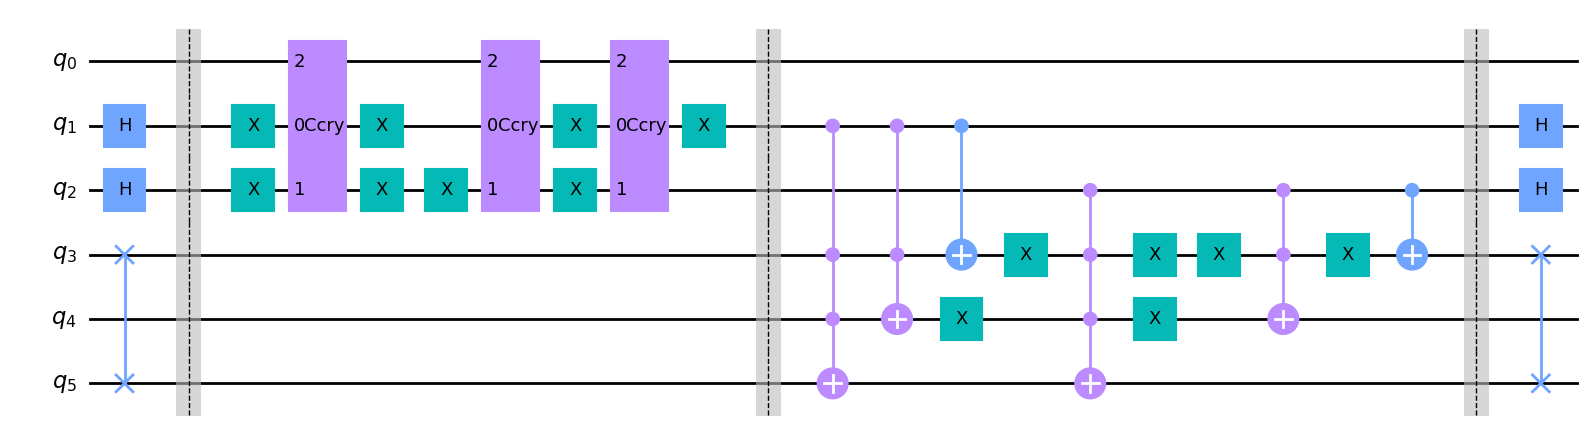

In [20]:
import pennylane as qml
from pennylane.templates.state_preparations.mottonen import compute_theta, gray_code
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[0.1, 0.3, 0.,  0.,  0.,  0.,  0.,  0.6],
 [0.6, 0.1, 0.3, 0.,  0.,  0.,  0.,  0. ],
 [0.,  0.6, 0.1, 0.3, 0.,  0.,  0.,  0. ],
 [0.,  0.,  0.6, 0.1, 0.3, 0.,  0.,  0. ],
 [0.,  0.,  0.,  0.6, 0.1, 0.3, 0.,  0. ],
 [0.,  0.,  0.,  0.,  0.6, 0.1, 0.3, 0. ],
 [0.,  0.,  0.,  0.,  0.,  0.6, 0.1, 0.3],
 [0.3, 0.,  0.,  0.,  0.,  0.,  0.6, 0.1]])

s = int(np.log2(A.shape[0]))  # number of qubits needed to encode A


wires_i = [1,2]        # depends on the sparse structure of A
wires_j = [3,4,5]  # depends on the size of A



def UA(cir,theta, wires_i):
     # qml.ctrl(qml.RY, control=wire_i, control_values=[0, 0])(theta[0], wires=ancilla)
     # qml.ctrl(qml.RY, control=wire_i, control_values=[1, 0])(theta[1], wires=ancilla)
     # qml.ctrl(qml.RY, control=wire_i, control_values=[0, 1])(theta[2], wires=ancilla)

    cir.x(1)
    cir.x(2)
    print(theta[0],wires_i)
    cir.ry(0,theta[0],controls=wires_i)
    cir.x(1)
    cir.x(2)

    cir.x(2)
    cir.ry(0,theta[1],controls=wires_i)
    cir.x(2)

    cir.x(1)
    cir.ry(0,theta[2],controls=wires_i)
    cir.x(1)
    return cir

def shift_op(cir,s_wires,control,shift="Left"):
    for index in range(len(s_wires)-1, 0, -1):
        
        control_values = [1] * index if shift == "Left" else [0] * index
        for i in range(len(control_values)):
            if control_values[i]==0:
                cir.x(s_wires[i])

        cir.x(s_wires[index],controls=[control]+s_wires[:index])

        for i in range(len(control_values)):
            if control_values[i]==0:
                cir.x(s_wires[i])

    cir.x(s_wires[0],controls=[control])
    return cir

def HN(cir):
    cir.h(1)
    cir.h(2)
    return cir

def UB(cir,wires_i, wires_j):
    cir=shift_op(cir,wires_j,wires_i[0],shift="Left")
    cir=shift_op(cir,wires_j,wires_i[1],shift="Right")


def circuit(cir):
    HN(cir)
    cir.barrier()
    UA(cir,thetas, wires_i)
    cir.barrier()
    UB(cir,wires_i, wires_j)
    cir.barrier()
    HN(cir)
    return cir

s = 4  # normalization constant
thetas = 2 * np.arccos(np.array([0.1-1, 0.6, 0.3])).flatten()

cir = dq.QubitCircuit(6)
cir.swap([3, 5])
# cir.swap([1, 2])
cir=circuit(cir)
cir.swap([3, 5])
# cir.swap([1, 2])
cir.draw()

In [21]:
U = cir.get_unitary()
U[:8,:8]*4

tensor([[0.1000+0.j, 0.3000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j,
         0.6000+0.j],
        [0.6000+0.j, 0.1000+0.j, 0.3000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j,
         0.0000+0.j],
        [0.0000+0.j, 0.6000+0.j, 0.1000+0.j, 0.3000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j,
         0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.6000+0.j, 0.1000+0.j, 0.3000+0.j, 0.0000+0.j, 0.0000+0.j,
         0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.6000+0.j, 0.1000+0.j, 0.3000+0.j, 0.0000+0.j,
         0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.6000+0.j, 0.1000+0.j, 0.3000+0.j,
         0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.6000+0.j, 0.1000+0.j,
         0.3000+0.j],
        [0.3000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.6000+0.j,
         0.1000+0.j]])

In [2]:
import numpy as np

In [3]:
A=np.array([[2,1],[1,0]])
# b=[3,1]

I=np.eye(4)
I1=np.array([[0,1],[0,0]])
I2=np.array([[0,0],[1,0]])

# A=np.array([[2/np.sqrt(5),1/np.sqrt(5)],[1/np.sqrt(5),0]])
b=np.array([3/np.sqrt(10),1/np.sqrt(10)])
U_b=np.array([[3/np.sqrt(10),1/np.sqrt(10)],[1/np.sqrt(10),-3/np.sqrt(10)]])
Q_b=np.array([[1/10,-3/10],[-3/10,9/10]])

H0=np.kron(I1,Q_b)+np.kron(I2,Q_b)
H1=np.kron(I1,A@Q_b)+np.kron(I2,Q_b@A)

# x_begin=np.array([[0],[0],[3/np.sqrt(10)],[1/np.sqrt(10)]])
x_begin=np.array([[-3/np.sqrt(10)],[-1/np.sqrt(10)],[0],[0]])


In [5]:
basis1 = np.linalg.eigh(H0)[1][:,1]
basis2 = np.linalg.eigh(H0)[1][:,2]

In [6]:
target = np.array([1,1,0,0])/np.sqrt(2)
H1@target

array([0.00000000e+00, 0.00000000e+00, 2.77555756e-17, 5.55111512e-17])

In [14]:
target = np.array([1,1,0,0])/np.sqrt(2)

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
theta = torch.tensor(0.,requires_grad=True)
phi = torch.tensor(0.,requires_grad=True)
# start = np.sin(theta)*basis1 + np.exp(1j*phi)*np.cos(theta)*basis2
optimizer = torch.optim.SGD([theta, phi], lr=0.01)
def Ht(t):
    return (1-t)*H0+t*H1

def loss(theta,phi):
# proj = [ ]
    step=200
    start = torch.sin(theta)*torch.tensor(basis1) + torch.exp(1j*phi)*torch.cos(theta)*torch.tensor(basis2)
    x_end= start
    for i in range(step+1):
        t=i/step
        dt=1/80
        x_end= torch.matrix_exp(torch.tensor(-1j*Ht(t)*dt))@x_end.reshape(4,1)
#         print(x_end) 
        norm = torch.sqrt(sum(abs(x_end)**2))
        x_end = (x_end/norm).reshape(1,4)
#         print(norm)
        target_ts = torch.tensor(target, dtype=x_end.dtype).reshape(4,1)
#         print(x_end.conj().size(), target_ts.size())
        proj_i = x_end.conj() @target_ts
#         print(abs(proj_i)**2) 
    return 1- abs(proj_i)**2

In [204]:
type(loss_.item())

float

In [226]:
temp = np.zeros([21, 21])

ii=0
for a in np.linspace(0,2*np.pi,21):
    tt =[ ]
    for b in np.linspace(0,2*np.pi,21):
        theta = torch.tensor(a,requires_grad=True)
        phi = torch.tensor(b,requires_grad=True)
        tt.append(loss(theta, phi).item())
    temp[ii] = tt
    print(ii)
    ii = ii+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [224]:
min((temp).flatten())

0.3490489389893996

In [227]:
min((temp).flatten())

0.24780546471782805

In [228]:
temp

array([[0.87606625, 0.87606625, 0.87606625, 0.87606625, 0.87606625,
        0.87606625, 0.87606625, 0.87606625, 0.87606625, 0.87606625,
        0.87606625, 0.87606625, 0.87606625, 0.87606625, 0.87606625,
        0.87606625, 0.87606625, 0.87606625, 0.87606625, 0.87606625,
        0.87606625],
       [0.66213086, 0.67020805, 0.69364896, 0.73015903, 0.77616441,
        0.82716177, 0.87815912, 0.9241645 , 0.96067458, 0.98411549,
        0.99219268, 0.98411549, 0.96067458, 0.9241645 , 0.87815912,
        0.82716177, 0.77616441, 0.73015903, 0.69364896, 0.67020805,
        0.66213086],
       [0.43210256, 0.44517172, 0.48309991, 0.54217446, 0.61661273,
        0.69912818, 0.78164364, 0.8560819 , 0.91515645, 0.95308464,
        0.9661538 , 0.95308464, 0.91515645, 0.8560819 , 0.78164364,
        0.69912818, 0.61661273, 0.54217446, 0.48309991, 0.44517172,
        0.43210256],
       [0.27384434, 0.2869135 , 0.3248417 , 0.38391624, 0.45835451,
        0.54086996, 0.62338542, 0.69782369, 0.7568982

In [209]:
for epoch in range(100):
    # 创建DataLoader
    theta = torch.tensor(0., requires_grad=True)
    phi = torch.tensor(0.,requires_grad=True)
    optimizer = torch.optim.SGD([theta, phi], lr=0.01)
    optimizer.zero_grad()
    
    loss_ = loss(theta, phi)
    print(loss_)
    loss_.backward()
    optimizer.zero_grad()

tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor([[0.9320]], dtype=

In [1]:
import torch

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [23]:
H0, H1

(array([[ 0. , -0. ,  0.1, -0.3],
        [-0. ,  0. , -0.3,  0.9],
        [ 0.1, -0.3,  0. , -0. ],
        [-0.3,  0.9, -0. ,  0. ]]),
 array([[-0. ,  0. , -0.1,  0.3],
        [ 0. , -0. ,  0.1, -0.3],
        [-0.1,  0.1, -0. ,  0. ],
        [ 0.3, -0.3,  0. , -0. ]]))

In [17]:
def Ht(t):
    return (1-t)*H0+t*H1

In [34]:
proj = [ ]
step=200
x_begin=np.array([[3/np.sqrt(10)],[1/np.sqrt(10)],[0],[0]])
x_end=x_begin
for i in range(step+1):
    t=i/step
    dt=4
    x_end=np.dot(expm((-1j*Ht(t)*dt)), x_end)
    norm = np.sqrt(sum(abs(x_end)**2))
    x_end = x_end/norm
    print(x_end, norm)
    proj_i = x_end.transpose().conjugate()@np.array([1,1,0,0])/np.sqrt(2)
#     print(x_end, norm, abs(proj_i)**2)
    proj.append(abs(proj_i)**2)

[[0.9486833 +0.00000000e+00j]
 [0.31622777+0.00000000e+00j]
 [0.        -9.71445147e-17j]
 [0.        +2.77555756e-17j]] [1.]
[[0.94921497+0.j        ]
 [0.31462739+0.j        ]
 [0.        -0.00023509j]
 [0.        +0.00070526j]] [1.]
[[0.94956518+0.00000000e+00j]
 [0.31356961+0.00000000e+00j]
 [0.        +8.56114286e-05j]
 [0.        -2.56834286e-04j]] [1.]
[[0.94964755+0.j        ]
 [0.31331994+0.j        ]
 [0.        -0.00011951j]
 [0.        +0.00035854j]] [1.]
[[0.95029729+0.j        ]
 [0.31134366+0.j        ]
 [0.        -0.00013809j]
 [0.        +0.00041426j]] [1.]
[[0.95040718+0.00000000e+00j]
 [0.31100818+0.00000000e+00j]
 [0.        +9.61652222e-05j]
 [0.        -2.88495667e-04j]] [1.]
[[0.95076803+0.j        ]
 [0.30990261+0.j        ]
 [0.        -0.00022843j]
 [0.        +0.00068529j]] [1.]
[[0.95129294+0.00000000e+00j]
 [0.30828838+0.00000000e+00j]
 [0.        +4.38182140e-05j]
 [0.        -1.31454642e-04j]] [1.]
[[0.95133276+0.00000000e+00j]
 [0.30816546+0.00000000e+0

[[-0.56017614+0.j        ]
 [-0.82831614+0.j        ]
 [ 0.        +0.00308327j]
 [ 0.        -0.00924981j]] [1.]
[[-0.57027525+0.j        ]
 [-0.82140622+0.j        ]
 [ 0.        +0.00279209j]
 [ 0.        -0.00837628j]] [1.]
[[-0.57941669+0.j        ]
 [-0.81499534+0.j        ]
 [ 0.        +0.00242677j]
 [ 0.        -0.0072803j ]] [1.]
[[-0.5877123 +0.j        ]
 [-0.80903952+0.j        ]
 [ 0.        +0.00222055j]
 [ 0.        -0.00666166j]] [1.]
[[-0.59581297+0.j        ]
 [-0.8030922 +0.j        ]
 [ 0.        +0.0022324j ]
 [ 0.        -0.00669719j]] [1.]
[[-0.60410841+0.j        ]
 [-0.79687061+0.j        ]
 [ 0.        +0.0022418j ]
 [ 0.        -0.00672541j]] [1.]
[[-0.61218158+0.j        ]
 [-0.79069115+0.j        ]
 [ 0.        +0.00203029j]
 [ 0.        -0.00609088j]] [1.]
[[-0.61937603+0.j        ]
 [-0.78507597+0.j        ]
 [ 0.        +0.00170464j]
 [ 0.        -0.00511392j]] [1.]
[[-0.62580436+0.j        ]
 [-0.77996428+0.j        ]
 [ 0.        +0.00156904j]
 [ 0.  

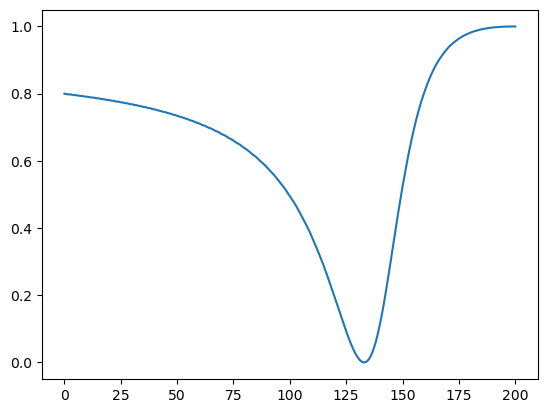

In [35]:
plt.plot(range(step+1), proj)

In [39]:
sum(abs(H0@x_begin))

array([6.9388939e-17])

In [41]:
0.2/2.6

0.07692307692307693

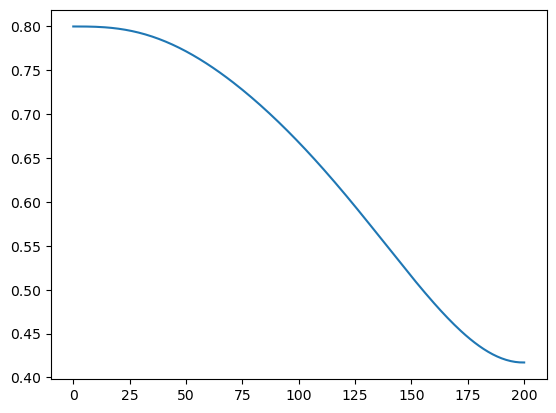

In [68]:
plt.plot(range(step+1), proj)

In [27]:
import numpy as np

def gram_schmidt_columns(X):
    """ 对矩阵X的列应用Gram-Schmidt正交化 """
    Q, R = np.linalg.qr(X)
    return Q

def create_ub(b):
    """ 创建一个酉矩阵U_b使得U_b|0>=|b> """
    # 验证b是否已归一化，如果不是则归一化
    b = np.array(b)
    if not np.isclose(np.linalg.norm(b), 1):
        b = b / np.linalg.norm(b)
    
    # 获取向量b的维度
    n = b.shape[0]
    
    # 构建一个矩阵，第一列为b
    U = np.zeros((n, n), dtype=complex)  # 使用复数类型以处理一般情况
    U[:, 0] = b
    
    # 生成剩余的n-1个基向量
    # 开始时使用标准正交基向量
    for i in range(1, n):
        U[:, i] = np.eye(n)[:, i]
    
    # 应用Gram-Schmidt过程来正交化这些向量
    U = gram_schmidt_columns(U)
    
    return U

# 示例
b = [3, 1]  # 这里可以是任何向量
U_b = create_ub(b)
print("Matrix U_b:\n", U_b)
print("U_b |0>:\n", np.dot(U_b, np.array([1, 0])))

Matrix U_b:
 [[-0.9486833 +0.j -0.31622777+0.j]
 [-0.31622777-0.j  0.9486833 +0.j]]
U_b |0>:
 [-0.9486833 +0.j -0.31622777+0.j]


In [ ]:
#######################################################################################################

c:\Users\HP\.conda\envs\dq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


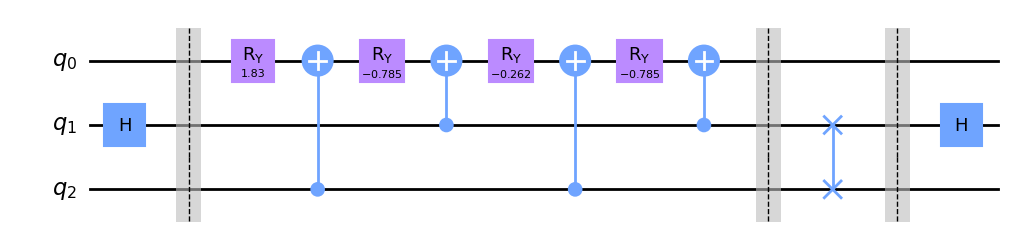

In [92]:
import deepquantum as dq
import numpy as np
from pennylane.templates.state_preparations.mottonen import compute_theta, gray_code

A = np.array([[2, 1],
              [1, 0]])/2

alphas = np.arccos(A).flatten()
thetas= compute_theta(alphas)

s = int(np.log2(A.shape[0]))
wires_i = [f"i{index}" for index in range(s)]
wires_j = [f"j{index}" for index in range(s)]

code = gray_code(2 * np.log2(len(A)))
n_selections = len(code)

control_wires = [int(np.log2(int(code[i], 2) ^ int(code[(i + 1) %
                 n_selections], 2))) for i in range(n_selections)]

wire_map = {control_index : wire for control_index, wire in enumerate(wires_j + wires_i)}


def UA1(cir,thetas, control_wires, ancilla):
    for theta, control_index in zip(thetas, control_wires):
        cir.ry(0,2 * theta)

        if wire_map[control_index]=='i0':
             wires_n=1

        if wire_map[control_index]=='j0':
             wires_n=2

        cir.cnot(wires_n,0)

def UA2(cir,wires_i, wires_j):
    for w_i, w_j in zip(wires_i, wires_j):
        if w_i=='i0':
             i=1

        if w_j=='j0':
             j=2

        cir.swap([i, j])

def HN(cir):
        cir.h(1)

def circuit_UA(cir):
    HN(cir)
    cir.barrier()
    UA1(cir,thetas, control_wires,0)
    cir.barrier()
    UA2(cir,wires_i, wires_j)
    cir.barrier()
    HN(cir)
    return cir

cir = dq.QubitCircuit(3)

cir=circuit_UA(cir)

cir.draw()


In [93]:
UA = cir.get_unitary()
UA[:2,:2]*4

tensor([[ 2.0000e+00+0.j,  1.0000e+00+0.j],
        [ 1.0000e+00+0.j, -8.9459e-08+0.j]])

In [94]:
UA[:4,:4]

tensor([[ 5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j],
        [ 2.5000e-01+0.j, -2.2365e-08+0.j, -2.5000e-01+0.j,  2.2365e-08+0.j],
        [ 5.0000e-01+0.j, -2.5000e-01+0.j,  5.0000e-01+0.j, -2.5000e-01+0.j],
        [ 2.5000e-01+0.j,  2.2365e-08+0.j, -2.5000e-01+0.j, -2.2365e-08+0.j]])

In [95]:
UA[4:8,4:8]

tensor([[ 5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j],
        [ 2.5000e-01+0.j, -3.9390e-08+0.j, -2.5000e-01+0.j,  3.9390e-08+0.j],
        [ 5.0000e-01+0.j, -2.5000e-01+0.j,  5.0000e-01+0.j, -2.5000e-01+0.j],
        [ 2.5000e-01+0.j,  3.9390e-08+0.j, -2.5000e-01+0.j, -3.9390e-08+0.j]])

In [96]:
UA

tensor([[ 5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j,
          2.3261e-08+0.j, -4.3301e-01+0.j,  2.3261e-08+0.j, -4.3301e-01+0.j],
        [ 2.5000e-01+0.j, -2.2365e-08+0.j, -2.5000e-01+0.j,  2.2365e-08+0.j,
         -4.3301e-01+0.j, -5.0000e-01+0.j,  4.3301e-01+0.j,  5.0000e-01+0.j],
        [ 5.0000e-01+0.j, -2.5000e-01+0.j,  5.0000e-01+0.j, -2.5000e-01+0.j,
          2.3261e-08+0.j,  4.3301e-01+0.j,  2.3261e-08+0.j,  4.3301e-01+0.j],
        [ 2.5000e-01+0.j,  2.2365e-08+0.j, -2.5000e-01+0.j, -2.2365e-08+0.j,
         -4.3301e-01+0.j,  5.0000e-01+0.j,  4.3301e-01+0.j, -5.0000e-01+0.j],
        [-4.3438e-08+0.j,  4.3301e-01+0.j, -4.3438e-08+0.j,  4.3301e-01+0.j,
          5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j],
        [ 4.3301e-01+0.j,  5.0000e-01+0.j, -4.3301e-01+0.j, -5.0000e-01+0.j,
          2.5000e-01+0.j, -3.9390e-08+0.j, -2.5000e-01+0.j,  3.9390e-08+0.j],
        [-4.3438e-08+0.j, -4.3301e-01+0.j, -4.3438e-08+0.j, -4.3301e-0

In [65]:
import deepquantum as dq
import numpy as np


def HS(U_A,U_b,s):


    # 应用Hadamard门
    cir.h(2)
    cir.barrier()

    # CU_Qb1
    cir.any(unitary=U_b,wires=[5],name='U_b')
    cir.z(5,controls=[0,2])
    cir.any(unitary=U_b.conj().T,wires=[5],name='U_b_dagger')
    cir.barrier()

    # CR_s0
    cir.x(0)
    cir.cry(0,1,s)
    cir.x(0)
    cir.h(1,0)
    cir.barrier()

    # U_A_f
    cir.any(unitary=U_A,wires=[3,4,5],name='U_A',controls=[0,1])
    cir.x(0)
    cir.any(unitary=U_A.conj().T,wires=[3,4,5],name='U_A_dagger',controls=[0,1])
    cir.barrier()

    # CR_s0
    cir.h(1,0)
    cir.x(0)
    cir.cry(0,1,s)
    cir.x(0)
    cir.barrier()

    # CU_Qb1
    cir.any(unitary=U_b,wires=[5],name='U_b')
    cir.z(5,controls=[0,2])
    cir.any(unitary=U_b.conj().T,wires=[5],name='U_b_dagger')
    cir.barrier()

    # 应用Hadamard门
    cir.h(2)
    cir.barrier()

    # # 测量控制寄存器
    # cir.measure(wires=0)

    return cir

U_A=UA
U_b=np.array([[3/np.sqrt(10),1/np.sqrt(10)],[1/np.sqrt(10),-3/np.sqrt(10)]])
s=1

cir = dq.QubitCircuit(6)
# 绘制量子线路图

N=10
cir.any(unitary=U_b,wires=[5],name='U_b')
for i in range(N+1):


    HS_circuit = HS(U_A,U_b,i/N*np.pi/2)
    cir.barrier()
    #  \begin{pmatrix}
    # -1 & 0 & 0 & 0 \\
    # 0 & 1 & 0 & 0 \\
    # 0 & 0 & 1 & 0 \\
    # 0 & 0 & 0 & 1
    # \end{pmatrix}
    # \]

    # HS_circuit.xlayer(wires=[1,2,3,4])
    # HS_circuit.z(4,controls=[1,2,3])
    # HS_circuit.xlayer(wires=[1,2,3,4])


    # #  \begin{pmatrix}
    # # 1 & 0 & 0 & 0 \\
    # # 0 & -1 & 0 & 0 \\
    # # 0 & 0 & -1 & 0 \\
    # # 0 & 0 & 0 & -1
    # # \end{pmatrix}
    # # \]

    # cir.z(4,controls=[1,2,3])   
    # cir.zlayer(wires=[1,2,3,4])

    cir.barrier()

# HS_circuit.draw()

In [115]:
cir = dq.QubitCircuit(6)

# 应用Hadamard门
cir.h(2)
cir.barrier()

# # CU_Qb1
# cir.any(unitary=U_b,wires=[5],name='U_b')
# cir.z(5,controls=[0,2])

# U_b_dagger=U_b.conj().T
# cir.any(unitary=U_b_dagger,wires=[5],name='U_b_dagger')

cir.any(unitary=U_A.conj().T,wires=[3,4,5],name='U_A',controls=[0,1])
# # cir.barrier()



cir.get_unitary()

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [112]:
U_A

tensor([[ 5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j,
          2.3261e-08+0.j, -4.3301e-01+0.j,  2.3261e-08+0.j, -4.3301e-01+0.j],
        [ 2.5000e-01+0.j, -2.2365e-08+0.j, -2.5000e-01+0.j,  2.2365e-08+0.j,
         -4.3301e-01+0.j, -5.0000e-01+0.j,  4.3301e-01+0.j,  5.0000e-01+0.j],
        [ 5.0000e-01+0.j, -2.5000e-01+0.j,  5.0000e-01+0.j, -2.5000e-01+0.j,
          2.3261e-08+0.j,  4.3301e-01+0.j,  2.3261e-08+0.j,  4.3301e-01+0.j],
        [ 2.5000e-01+0.j,  2.2365e-08+0.j, -2.5000e-01+0.j, -2.2365e-08+0.j,
         -4.3301e-01+0.j,  5.0000e-01+0.j,  4.3301e-01+0.j, -5.0000e-01+0.j],
        [-4.3438e-08+0.j,  4.3301e-01+0.j, -4.3438e-08+0.j,  4.3301e-01+0.j,
          5.0000e-01+0.j,  2.5000e-01+0.j,  5.0000e-01+0.j,  2.5000e-01+0.j],
        [ 4.3301e-01+0.j,  5.0000e-01+0.j, -4.3301e-01+0.j, -5.0000e-01+0.j,
          2.5000e-01+0.j, -3.9390e-08+0.j, -2.5000e-01+0.j,  3.9390e-08+0.j],
        [-4.3438e-08+0.j, -4.3301e-01+0.j, -4.3438e-08+0.j, -4.3301e-0

In [58]:
HS_circuit()
# HS_circuit.measure(wires=[5])
HS_circuit.measure()

{'110110': 95,
 '100010': 175,
 '100000': 149,
 '101001': 65,
 '100011': 14,
 '110100': 73,
 '111111': 39,
 '101000': 14,
 '100100': 68,
 '101101': 24,
 '100110': 5,
 '111110': 9,
 '101010': 4,
 '111101': 92,
 '110011': 8,
 '101111': 32,
 '101011': 40,
 '110010': 47,
 '100001': 19,
 '111100': 9,
 '101110': 6,
 '110101': 7,
 '110111': 7,
 '100101': 10,
 '101100': 2,
 '100111': 1,
 '111001': 6,
 '110000': 3,
 '111011': 1}

In [170]:
cir = dq.QubitCircuit(2)
cir.xlayer()
cir.z(1,controls=0)
cir.xlayer()
cir.get_unitary()

tensor([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [210]:
import numpy as np

# 定义两个矩阵
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 2]])

# 使用 np.dot() 计算 A 和 B 的矩阵乘积
C = np.dot(A, 0.1)

# 打印结果
print(C)
A@0.1

[[0.1 0.2]
 [0.3 0.4]]


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [61]:
import numpy as np

# 假设A是一个numpy矩阵
A = np.array([[2, 1], [1, 0]])

# 计算矩阵A的逆
A_inv = np.linalg.inv(A)

# 计算矩阵A的L2范数（谱范数）
A_norm = np.linalg.norm(A, ord=2)

# 计算矩阵A的逆的L2范数
A_inv_norm = np.linalg.norm(A_inv, ord=2)

# 打印结果
print("矩阵A的L2范数:", A_norm)
print("矩阵A的逆的L2范数:", A_inv_norm)
print("k:", A_norm/A_inv_norm)

矩阵A的L2范数: 2.4142135623730954
矩阵A的逆的L2范数: 2.414213562373095
k: 1.0000000000000002
